In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection, svm

import seaborn as sns; sns.set_theme()
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-data/BankChurners.csv


# importando nosso dataframe

In [2]:
#carrega a base de treino
df=pd.read_csv(r"../input/churn-data/BankChurners.csv",encoding='latin-1')

# Removendo colunas desnecessarias

as duas ultimas colunas causam sobreajuste dos dados.

In [3]:
x = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
             ,'Attrition_Flag','CLIENTNUM'],axis='columns')

# Como os dados se comportam ?

In [4]:
df.sample(n=10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
4822,716680983,Existing Customer,41,F,3,Doctorate,Married,Less than $40K,Blue,36,...,1956.0,1053,903.0,0.941,4924,70,0.795,0.538,0.000050,0.999950
9338,716296833,Existing Customer,56,M,0,Doctorate,Single,$80K - $120K,Blue,47,...,7204.0,0,7204.0,0.803,14042,113,0.766,0.000,0.000068,0.999930
7375,711992133,Existing Customer,53,F,1,Uneducated,Married,Less than $40K,Blue,41,...,2596.0,868,1728.0,0.743,4801,72,0.714,0.334,0.000110,0.999890
377,714217908,Existing Customer,49,M,3,Graduate,Married,$40K - $60K,Blue,41,...,2406.0,1560,846.0,0.751,1173,32,0.391,0.648,0.000187,0.999810
9756,708385533,Attrited Customer,49,F,1,Graduate,Married,Less than $40K,Silver,36,...,11059.0,0,11059.0,0.990,9524,80,0.905,0.000,0.996120,0.003881
7706,797218233,Existing Customer,51,F,2,Unknown,Single,Less than $40K,Blue,45,...,1757.0,0,1757.0,0.533,4550,82,0.547,0.000,0.000022,0.999980
4361,711047658,Existing Customer,46,F,3,High School,Married,Less than $40K,Blue,38,...,1781.0,1315,466.0,0.704,4775,83,0.729,0.738,0.000115,0.999890
5746,720853158,Existing Customer,38,F,3,High School,Single,Unknown,Blue,24,...,13951.0,1607,12344.0,0.932,4576,70,0.591,0.115,0.000305,0.999690
5808,815088483,Existing Customer,28,F,1,Graduate,Divorced,Less than $40K,Blue,23,...,2543.0,1156,1387.0,0.641,3864,64,0.684,0.455,0.000087,0.999910
8492,779247483,Attrited Customer,46,F,1,Uneducated,Unknown,Unknown,Blue,28,...,2069.0,0,2069.0,0.656,2754,55,0.667,0.000,0.998960,0.001043


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

## Não apresentarei boxplots que não possuem otliers para não sobrecarregar a quantidade de boxplot no arquivo python.

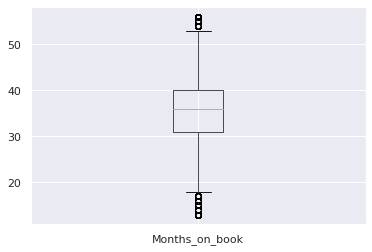

In [6]:
boxplot = df.boxplot(column=['Months_on_book'])

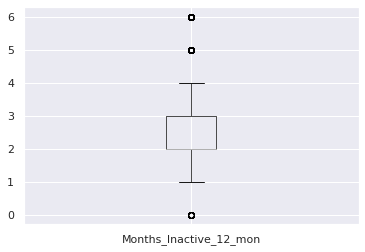

In [7]:
boxplot = df.boxplot(column=['Months_Inactive_12_mon'])

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

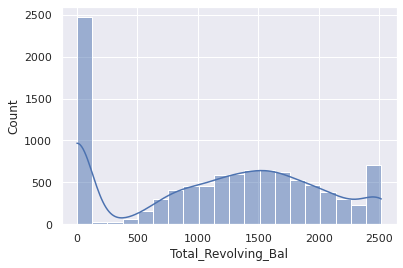

In [8]:
sns.histplot((df['Total_Revolving_Bal']), kde=True)

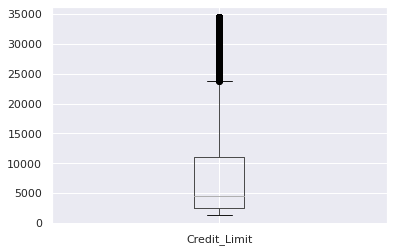

In [9]:
boxplot = df.boxplot(column=['Credit_Limit'])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

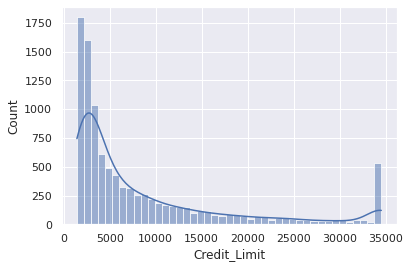

In [10]:
sns.histplot((df['Credit_Limit']), kde=True)

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

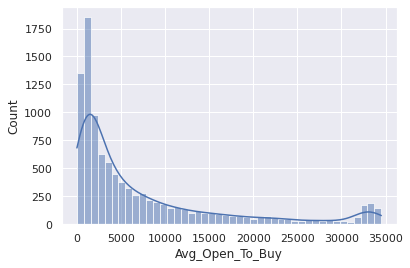

In [11]:

sns.histplot((df['Avg_Open_To_Buy']), kde=True)

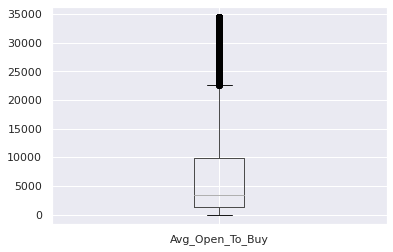

In [12]:
boxplot = df.boxplot(column=['Avg_Open_To_Buy'])

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

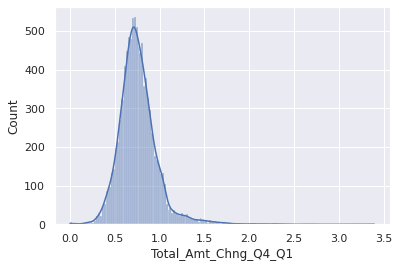

In [13]:
sns.histplot((df['Total_Amt_Chng_Q4_Q1']), kde=True)

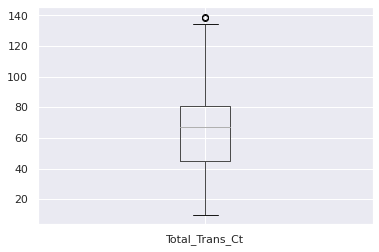

In [14]:
boxplot = df.boxplot(column=['Total_Trans_Ct'])

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

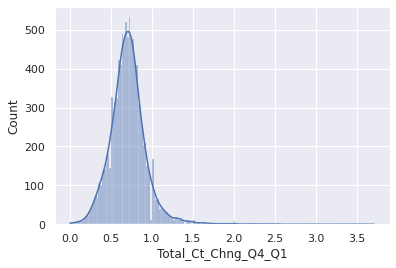

In [15]:
sns.histplot((df['Total_Ct_Chng_Q4_Q1']), kde=True)

# Tratando alguns outliers

In [16]:
#esta função encontra os limites superiores e inferiores
# e retorna o dataframe dentro dos limites
def boxplott(df,text):
    #df=df.sort_values(text)
    Q1=df[text].quantile(q=0.25)
    Q3=df[text].quantile(q=0.75)
    FIQ = Q3-Q1

    LF = Q1 - 1.5 * FIQ
    LS = Q3 + 1.5 * FIQ
    
    #print('LS : ', LS)
    #print('LF : ', LF)
    df.loc[df[text] > LS , text] = LS
    df.loc[df[text] < LF , text] = LF
    return df

### Vamos converter algumas colunas para seu logaritmo, isso faz com que reduza levemente os outliers da coluna especifica.
### outra abordagem é quando em uma coluna há poucos outlier aplico a função boxplott que reduz os outliers. Em algumas situações pode se mostrar ineficiente mas aqui aumentou levemente a accuracy.

In [17]:
x['Total_Amt_Chng_Q4_Q1']=np.log(x['Total_Amt_Chng_Q4_Q1']+1)
x['Avg_Open_To_Buy']=np.log(x['Avg_Open_To_Buy']+1)
x['Total_Ct_Chng_Q4_Q1']=np.log(x['Total_Ct_Chng_Q4_Q1']+1)
x = boxplott(x,'Months_on_book')
x = boxplott(x,'Months_Inactive_12_mon')
x = boxplott(x,'Contacts_Count_12_mon')
x = boxplott(x,'Total_Trans_Ct')

# O que utilizar? Label encoder ou OneHotEncoder?

Testei ambas abordagens e cheguei a conclusão que Label Encoder foi mais promissor se tratando dos dois modelos de ML que utilizei. Talvez em uma rede neural a abordagem mudaria.

### Label encoder

In [18]:

labelencoder = LabelEncoder()
x['Gender'] = labelencoder.fit_transform(x['Gender'])
x['Education_Level'] = labelencoder.fit_transform(x['Education_Level'])
x['Marital_Status'] = labelencoder.fit_transform(x['Marital_Status'])
x['Income_Category'] = labelencoder.fit_transform(x['Income_Category'])
x['Card_Category'] = labelencoder.fit_transform(x['Card_Category'])

### one hot encoder :

In [19]:
#x = pd.get_dummies(x)

### Como ficaram os dados?

In [20]:
x.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39.0,5,1.0,3.0,12691.0,777,9.385553,0.848012,1144,42,0.965081,0.061
1,49,0,5,2,2,4,0,44.0,6,1.0,2.0,8256.0,864,8.908289,0.932558,1291,33,1.550537,0.105
2,51,1,3,2,1,3,0,36.0,4,1.0,0.5,3418.0,0,8.137103,1.279266,1887,20,1.203873,0.000
3,40,0,4,3,3,4,0,34.0,3,4.0,1.0,3313.0,2517,6.680855,0.877550,1171,20,1.203873,0.760
4,40,1,3,5,1,2,0,21.0,5,1.0,0.5,4716.0,0,8.458928,1.155308,816,28,1.252763,0.000


# SEPARAÇÃO TREINO E TESTE

In [21]:
#Separação entre treino e teste
y=df['Attrition_Flag']
#del df 

np.random.seed(50)
x_treino, x_teste, y_treino, y_teste = train_test_split (x, y, test_size = 0.20, random_state = 42)

# FASE DE TREINAMENTO E TESTE

##### OPITEI POR UTILIZAR DOIS MODELOS DE ML QUE SÃO EXTREMAMENTE RAPIDOS, O PRIMIERO É XGB E O SEGUNDO RANDO FOREST
##### TESTEI SVM MAS SE MOSTROU EXTREMAMENTE LENTO, ENTÃO OPTEI POR REMOVELO POIS NÃO HAVERIA TEMPO PARA EXECUÇÃO.
##### DEIXEI O MODELO DESCOBRIR SEUS PARAMETROS PARA NÃO CAUSAR SOBRE AJUSTE TAMBÈM PORQUE NÃO HAVERIA TEMPO PARA TESTES COM DIVERSOS PARAMETROS.

##### VALE COMENTAR QUE UTILIZEI 5 FOLDS e MATRIZ DE CONFUSÃO PARA INTERPRETAR OS RESULTADOS. AO FINAL HÁ UM BREVE COMENTARIO SOBRE OS TESTES E SEUS RESPECTIVOS RESULTADOS.

# TREINAMENTO XGB

In [22]:
from xgboost import XGBClassifier
SVM = XGBClassifier(verbosity = 0)
SVM.fit(x_treino,y_treino)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

# TESTE PARA XGB

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Relatório de classificação:
                    precision    recall  f1-score   support

Attrited Customer     0.9060    0.8257    0.8640       327
Existing Customer     0.9670    0.9835    0.9752      1699

         accuracy                         0.9580      2026
        macro avg     0.9365    0.9046    0.9196      2026
     weighted avg     0.9572    0.9580    0.9572      2026



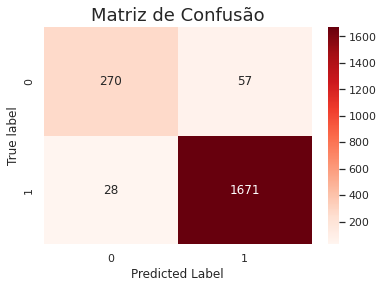

In [23]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(SVM, x_teste, y_teste, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_teste, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_teste, y_pred, digits=4))

# TREINAMENTO RANDOM FOREST

In [24]:
rf = RandomForestClassifier()
rf.fit(x_treino,y_treino)

RandomForestClassifier()

# TESTE RANDOM FOREST

Relatório de classificação:
                    precision    recall  f1-score   support

Attrited Customer     0.8889    0.7095    0.7891       327
Existing Customer     0.9462    0.9829    0.9642      1699

         accuracy                         0.9388      2026
        macro avg     0.9175    0.8462    0.8767      2026
     weighted avg     0.9369    0.9388    0.9359      2026



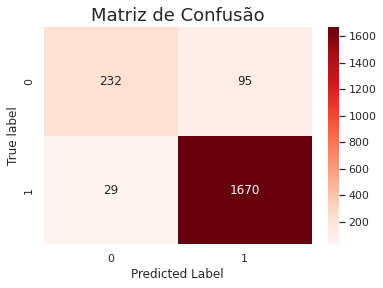

In [25]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(rf, x_teste, y_teste, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_teste, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_teste, y_pred, digits=4))

# CONSIDERAÇÕES FINAIS

## INFELIZMENTE NÃO TIVE TEMPO SUFICIENTE PARA TESTAR OUTROS MODELOS NEM APLICAR ENGENHARIA DE FEATURES QUE TROUXESSEM BENEFICIOS

### XGB SE MOSTROU MAIS EFICAZ OBTENDO 95.46% DE ACCURACY E 95.36% DE F1-SCORE